Name : Lakshya Gujar

TASK 7 - STOCK MARKET PREDICTION USING NUMERICAL & TEXUAL ANALYSIS

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# NLP Libraries
!pip install textblob
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader

print("Required Libraries Imported")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Required Libraries Imported


Importing Stock Dataset

In [2]:
stock_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EBSESN?period1=867715200&period2=1609891200&interval=1d&events=history&includeAdjustedClose=true')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [3]:
print("Dimension : {}".format(stock_data.shape), "\n")
print("Size : {}".format(stock_data.size), "\n")
print("No. of Duplicated Values : {}".format(stock_data.duplicated().sum()), "\n")
print("No. of Rows with NULL Values :\n{}".format(stock_data.isnull().sum()), "\n")
print("Descriptive Analysis :\n{}".format(stock_data.describe()), "\n")
print("\nInfo of Dataset : {}".format(stock_data.info()), "\n")

Dimension : (5916, 7) 

Size : 41412 

No. of Duplicated Values : 0 

No. of Rows with NULL Values :
Date           0
Open         125
High         125
Low          125
Close        125
Adj Close    125
Volume       125
dtype: int64 

Descriptive Analysis :
               Open          High           Low         Close     Adj Close  \
count   5791.000000   5791.000000   5791.000000   5791.000000   5791.000000   
mean   16456.876816  16558.453431  16322.745203  16438.176200  16438.176200   
std    11636.784021  11681.065352  11564.118152  11621.397528  11621.397528   
min     2621.889893   2682.590088   2594.870117   2600.120117   2600.120117   
25%     4794.065185   4843.530029   4733.175048   4772.439941   4772.439941   
50%    15995.139648  16202.870117  15822.320313  16015.559570  16015.559570   
75%    25879.900390  25977.064453  25658.445312  25838.425782  25838.425782   
max    48109.171875  48486.238281  47903.378906  48437.781250  48437.781250   

             Volume  
count  5

In [4]:
stock_data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0
...,...,...,...,...,...,...,...
5910,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800.0
5911,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
5912,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
5914,2021-01-04,48109.171875,48220.468750,47594.468750,48176.800781,48176.800781,13900.0


<AxesSubplot:>

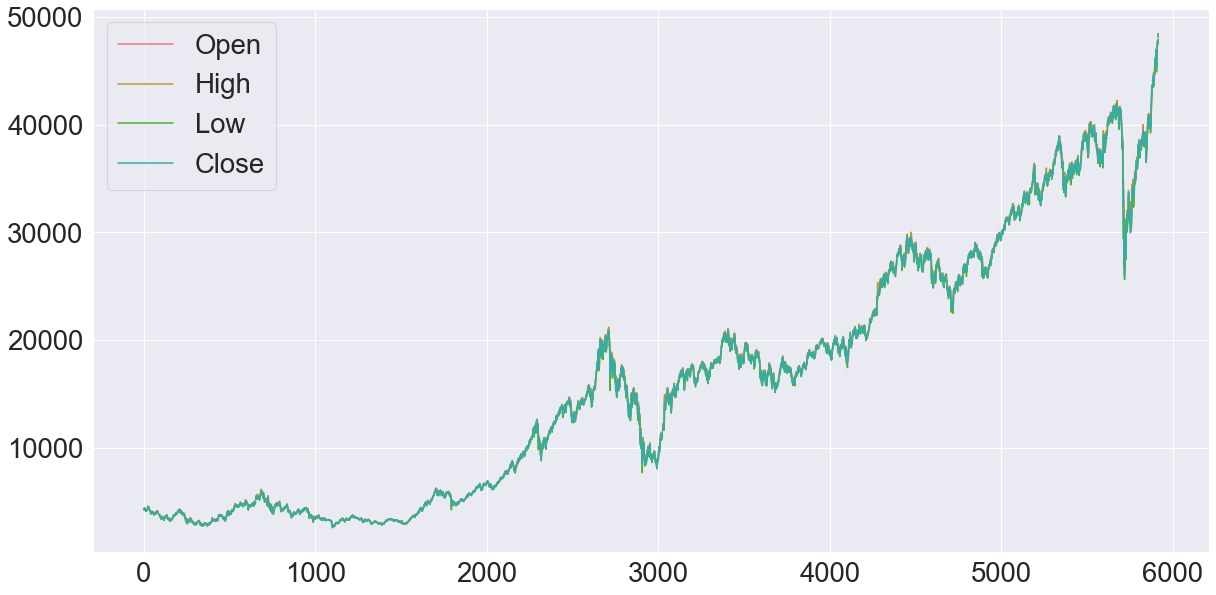

In [5]:
sns.set_theme(style = 'darkgrid', palette = 'husl', font_scale = 2.5)
stock_data[['Open', 'High', 'Low', 'Close']].plot(figsize = (20,10))

<AxesSubplot:>

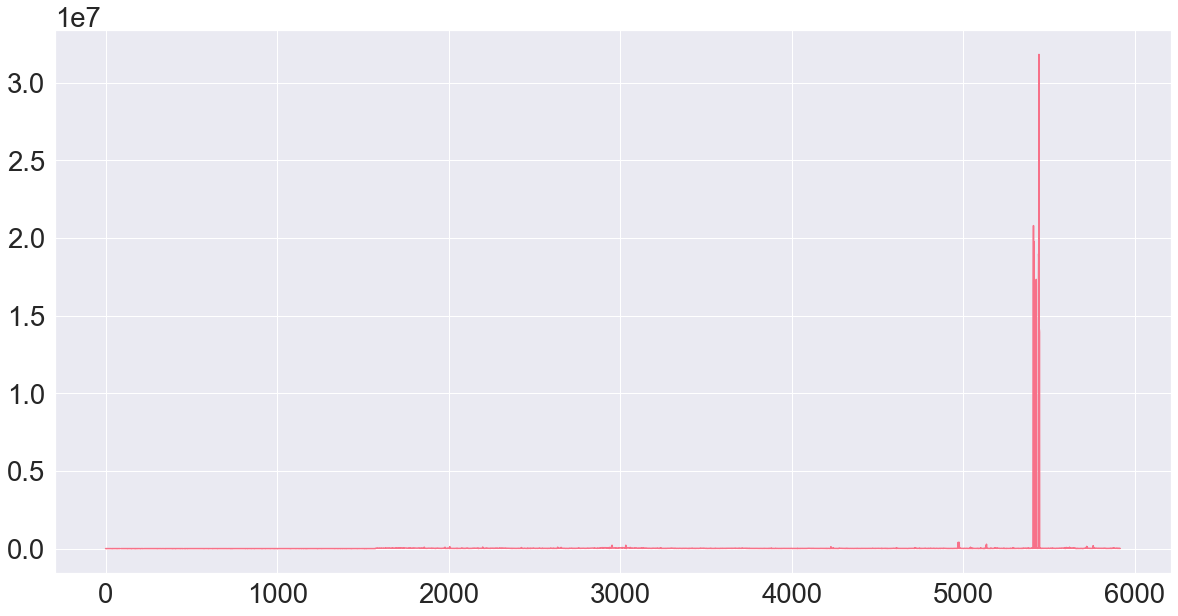

In [6]:
stock_data['Volume'].plot(figsize = (20,10))

Importing News Dataset

In [7]:
news_data = pd.read_csv(r'C:\Users\lucky\Documents\My Stuff\ML\TSF Grip Intern\india-news-headlines.csv')
news_data.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [8]:
news_data = news_data.rename(columns = {'publish_date':'Date'})

In [9]:
news_data['Date'] = pd.to_datetime(news_data['Date'], format = '%Y%m%d')
news_data = news_data.drop("headline_category", axis = 1)
news_data.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [10]:
news_data = news_data[news_data['Date'] >= "2015-10-19"]
news_data.sort_values(by = 'Date')

,Date,headline_text
2242851,2015-10-19,Here's how to calm your Monday in 5 minutes!
2243311,2015-10-19,All accused in Dadri lynching case arrested
2243312,2015-10-19,LOL: Laugh off your Monday blues!
2243313,2015-10-19,Cops' team heads to TN in search of killers
2243314,2015-10-19,BAI allows 4 'overage' players to compete at n...
...,...,...
3423727,2020-12-31,No Covid casualty in 7 dists of Vidarbha; reco...
3423726,2020-12-31,Cops across police stns in state to soon get w...
3423725,2020-12-31,Cops rescue trafficked girls from Bihar
3423738,2020-12-31,25% of four-wheelers in Karnataka yet to get F...


In [11]:
news_data['headline_text'] = news_data.groupby(['Date']).transform(lambda x : ' '.join(x))
news_data = news_data.drop_duplicates()
news_data.reset_index()

,index,Date,headline_text
0,2242851,2015-10-19,Here's how to calm your Monday in 5 minutes! I...
1,2243548,2015-10-20,How much water should you drink every day? Way...
2,2244248,2015-10-21,How to find the pleasure spots in your man Pak...
3,2244947,2015-10-22,Cancer: 12 foods to battle cancer Top 5 health...
4,2245645,2015-10-23,How to beat that bloating feeling 10 alternate...
...,...,...,...
1896,3421573,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
1897,3422072,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
1898,3422570,2020-12-29,Man recovers charred remains of 'thief' from h...
1899,3423069,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [12]:
print("Dimension : {}".format(news_data.shape), "\n")
print("Size : {}".format(news_data.size), "\n")
print("No. of Duplicated Values : {}".format(news_data.duplicated().sum()), "\n")
print("No. of Rows with NULL Values :\n{}".format(news_data.isnull().sum()), "\n")
print("\nInfo of Dataset : {}".format(news_data.info()), "\n")

Dimension : (1901, 2) 

Size : 3802 

No. of Duplicated Values : 0 

No. of Rows with NULL Values :
Date             0
headline_text    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 2242851 to 3423569
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1901 non-null   datetime64[ns]
 1   headline_text  1901 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 44.6+ KB

Info of Dataset : None 



In [13]:
stock_data = stock_data[stock_data['Date'] <= '2020-06-30']
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0
...,...,...,...,...,...,...,...
5779,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
5780,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
5781,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
5782,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [14]:
news_temp = news_data.drop_duplicates()
news_temp.duplicated().sum()

0

In [15]:
news_temp['words'] = news_temp['headline_text'].apply(lambda x : len(str(x).split(' ')))
news_temp[['headline_text', 'words']].head()

,headline_text,words
2242851,Here's how to calm your Monday in 5 minutes! I...,5467
2243548,How much water should you drink every day? Way...,5774
2244248,How to find the pleasure spots in your man Pak...,5672
2244947,Cancer: 12 foods to battle cancer Top 5 health...,5593
2245645,How to beat that bloating feeling 10 alternate...,5732


In [16]:
news_temp['chars'] = news_temp['headline_text'].str.len()
news_temp[['headline_text', 'chars']].head()

,headline_text,chars
2242851,Here's how to calm your Monday in 5 minutes! I...,34147
2243548,How much water should you drink every day? Way...,35830
2244248,How to find the pleasure spots in your man Pak...,34863
2244947,Cancer: 12 foods to battle cancer Top 5 health...,34430
2245645,How to beat that bloating feeling 10 alternate...,35645


In [17]:
def avg_word(headline_text):
    text = headline_text.split()
    return(sum(len(word) for word in text) / len(text))

news_temp['avg_word'] = news_temp['headline_text'].apply(lambda x : avg_word(x))
news_temp[['headline_text', 'avg_word']].head()

,headline_text,avg_word
2242851,Here's how to calm your Monday in 5 minutes! I...,5.246204
2243548,How much water should you drink every day? Way...,5.205577
2244248,How to find the pleasure spots in your man Pak...,5.146685
2244947,Cancer: 12 foods to battle cancer Top 5 health...,5.156088
2245645,How to beat that bloating feeling 10 alternate...,5.218772


In [18]:
stop = stopwords.words('english')
news_temp['stop_words'] = news_temp['headline_text'].apply(lambda x : len([x for x in x.split() if x in stop]))
news_temp[['headline_text', 'stop_words']].head()

,headline_text,stop_words
2242851,Here's how to calm your Monday in 5 minutes! I...,1118
2243548,How much water should you drink every day? Way...,1216
2244248,How to find the pleasure spots in your man Pak...,1216
2244947,Cancer: 12 foods to battle cancer Top 5 health...,1171
2245645,How to beat that bloating feeling 10 alternate...,1196


In [19]:
news_temp['numerics'] = news_temp['headline_text'].apply(lambda x : len([x for x in x.split() if x.isdigit()]))
news_temp[['headline_text', 'numerics']].head()

,headline_text,numerics
2242851,Here's how to calm your Monday in 5 minutes! I...,81
2243548,How much water should you drink every day? Way...,75
2244248,How to find the pleasure spots in your man Pak...,86
2244947,Cancer: 12 foods to battle cancer Top 5 health...,87
2245645,How to beat that bloating feeling 10 alternate...,94


In [20]:
news_temp['upper'] = news_temp['headline_text'].apply(lambda x : len([x for x in x.split() if x.isupper()]))
news_temp[['headline_text', 'upper']].head()

,headline_text,upper
2242851,Here's how to calm your Monday in 5 minutes! I...,202
2243548,How much water should you drink every day? Way...,257
2244248,How to find the pleasure spots in your man Pak...,247
2244947,Cancer: 12 foods to battle cancer Top 5 health...,237
2245645,How to beat that bloating feeling 10 alternate...,228


In [21]:
news_temp['headline_text'] = news_temp['headline_text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
news_temp['headline_text'].head()

2242851    here's how to calm your monday in 5 minutes! i...
2243548    how much water should you drink every day? way...
2244248    how to find the pleasure spots in your man pak...
2244947    cancer: 12 foods to battle cancer top 5 health...
2245645    how to beat that bloating feeling 10 alternate...
Name: headline_text, dtype: object

In [22]:
news_temp['headline_text'] = news_temp['headline_text'].str.replace('[^\w\s]', '')
news_temp['headline_text'].head()

C:\Users\lucky\AppData\Local\Temp/ipykernel_19308/1023200781.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  news_temp['headline_text'] = news_temp['headline_text'].str.replace('[^\w\s]', '')


2242851    heres how to calm your monday in 5 minutes in ...
2243548    how much water should you drink every day ways...
2244248    how to find the pleasure spots in your man pak...
2244947    cancer 12 foods to battle cancer top 5 healthi...
2245645    how to beat that bloating feeling 10 alternate...
Name: headline_text, dtype: object

In [23]:
stopword = set(stopwords.words('english'))
news_temp['headline_text'] = news_temp['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in stopword))
news_temp['headline_text'].head()

2242851    heres calm monday 5 minutes pics 7 super ways ...
2243548    much water drink every day ways identify diffe...
2244248    find pleasure spots man pak singers faced crit...
2244947    cancer 12 foods battle cancer top 5 healthiest...
2245645    beat bloating feeling 10 alternate treatments ...
Name: headline_text, dtype: object

In [24]:
common = pd.Series(' '.join(news_temp['headline_text']).split()).value_counts()[:20]
common

rs          35305
new         28356
held        25760
says        25467
man         25072
delhi       21354
get         21199
govt        20067
two         19885
cops        18858
2           18656
india       18554
police      18291
bjp         18149
city        17806
may         17338
hc          17273
case        16699
students    16438
woman       15913
dtype: int64

In [25]:
common = list(common.index)
news_temp['headline_text'] = news_temp['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in common))
news_temp['headline_text'].head()

2242851    heres calm monday 5 minutes pics 7 super ways ...
2243548    much water drink every day ways identify diffe...
2244248    find pleasure spots pak singers faced criticis...
2244947    cancer 12 foods battle cancer top 5 healthiest...
2245645    beat bloating feeling 10 alternate treatments ...
Name: headline_text, dtype: object

In [26]:
common = pd.Series(' '.join(news_temp['headline_text']).split()).value_counts()[-10:]
common

79l               1
monsooninduced    1
sirvoiverna       1
telemarketer      1
hardyal           1
arlekars          1
cutterwielding    1
evahanchori       1
thideer           1
9bala             1
dtype: int64

In [27]:
common = list(common.index)
news_temp['headline_text'] = news_temp['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in common))
news_temp['headline_text'].head()

2242851    heres calm monday 5 minutes pics 7 super ways ...
2243548    much water drink every day ways identify diffe...
2244248    find pleasure spots pak singers faced criticis...
2244947    cancer 12 foods battle cancer top 5 healthiest...
2245645    beat bloating feeling 10 alternate treatments ...
Name: headline_text, dtype: object

In [28]:
data = news_temp
data.columns

Index(['Date', 'headline_text', 'words', 'chars', 'avg_word', 'stop_words',
       'numerics', 'upper'],
      dtype='object')

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
TextBlob(str(data['headline_text'])).words

WordList(['2242851', 'heres', 'calm', 'monday', '5', 'minutes', 'pics', '7', 'super', 'ways', '2243548', 'much', 'water', 'drink', 'every', 'day', 'ways', 'identify', 'diffe', '2244248', 'find', 'pleasure', 'spots', 'pak', 'singers', 'faced', 'criticis', '2244947', 'cancer', '12', 'foods', 'battle', 'cancer', 'top', '5', 'healthiest', '2245645', 'beat', 'bloating', 'feeling', '10', 'alternate', 'treatments', '3421573', 'biginterview', 'dhritiman', 'chatterjee', 'nobody', 'dares', '3422072', 'horoscope', 'today', '28', 'december', '2020', 'check', 'astrolo', '3422570', 'recovers', 'charred', 'remains', 'thief', 'burnt', 'shop', 'dump', '3423069', 'numerology', 'readings', '30', 'december', '2020', 'predictio', '3423569', 'horoscope', 'today', '31', 'december', '2020', 'check', 'astrolo', 'Name', 'headline_text', 'Length', '1901', 'dtype', 'object'])

In [31]:
st = PorterStemmer()
data['headline_text'].apply(lambda x : ' '.join([st.stem(word) for word in x.split()]))

2242851    here calm monday 5 minut pic 7 super way wont ...
2243548    much water drink everi day way identifi differ...
2244248    find pleasur spot pak singer face critic thapp...
2244947    cancer 12 food battl cancer top 5 healthiest a...
2245645    beat bloat feel 10 altern treatment depress 8 ...
                                 ...                        
3421573    biginterview dhritiman chatterje nobodi dare m...
3422072    horoscop today 28 decemb 2020 check astrolog p...
3422570    recov char remain thief burnt shop dump believ...
3423069    numerolog read 30 decemb 2020 predict lucki co...
3423569    horoscop today 31 decemb 2020 check astrolog p...
Name: headline_text, Length: 1901, dtype: object

In [32]:
data['sentiment'] = data['headline_text'].apply(lambda x : TextBlob(x).sentiment.polarity)
news_temp[['headline_text', 'sentiment']].head()

,headline_text,sentiment
2242851,heres calm monday 5 minutes pics 7 super ways ...,0.089433
2243548,much water drink every day ways identify diffe...,0.045460
2244248,find pleasure spots pak singers faced criticis...,0.087048
2244947,cancer 12 foods battle cancer top 5 healthiest...,0.077245
2245645,beat bloating feeling 10 alternate treatments ...,0.053181


In [33]:
data1 = data[['Date', 'headline_text', 'sentiment']].reset_index()
data1 = data1.drop('index', axis = 1)
data1

,Date,headline_text,sentiment
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,0.089433
1,2015-10-20,much water drink every day ways identify diffe...,0.045460
2,2015-10-21,find pleasure spots pak singers faced criticis...,0.087048
3,2015-10-22,cancer 12 foods battle cancer top 5 healthiest...,0.077245
4,2015-10-23,beat bloating feeling 10 alternate treatments ...,0.053181
...,...,...,...
1896,2020-12-27,biginterview dhritiman chatterjee nobody dares...,0.005476
1897,2020-12-28,horoscope today 28 december 2020 check astrolo...,0.028241
1898,2020-12-29,recovers charred remains thief burnt shop dump...,0.033781
1899,2020-12-30,numerology readings 30 december 2020 predictio...,0.015298


In [34]:
stock_temp = stock_data[(stock_data['Date'] >= '2015-10-19') & (stock_data['Date'] <= '2020-06-30')]
stock_temp

,Date,Open,High,Low,Close,Adj Close,Volume
4630,2015-10-19,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0
4631,2015-10-20,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0
4632,2015-10-21,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0
4633,2015-10-23,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0
4634,2015-10-26,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0
...,...,...,...,...,...,...,...
5779,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
5780,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
5781,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
5782,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [35]:
data1 = data1[data1['Date'] <= '2020-06-30']
data1

,Date,headline_text,sentiment
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,0.089433
1,2015-10-20,much water drink every day ways identify diffe...,0.045460
2,2015-10-21,find pleasure spots pak singers faced criticis...,0.087048
3,2015-10-22,cancer 12 foods battle cancer top 5 healthiest...,0.077245
4,2015-10-23,beat bloating feeling 10 alternate treatments ...,0.053181
...,...,...,...
1712,2020-06-26,containment zone residents slam high prices ch...,0.039440
1713,2020-06-27,like wont let toxic relationship food major ra...,0.047291
1714,2020-06-28,atanu ghosh plans rewrite old scripts make rel...,0.032367
1715,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,0.034411


<AxesSubplot:>

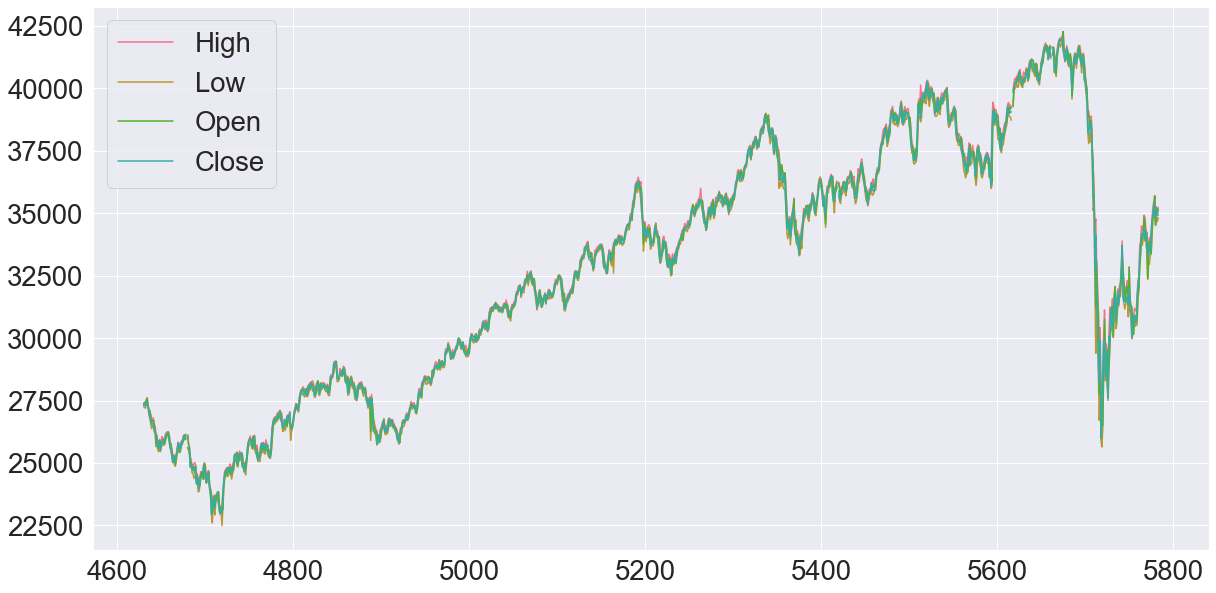

In [36]:
stock_temp[['High', 'Low', 'Open', 'Close']].plot(figsize = (20,10))

<AxesSubplot:>

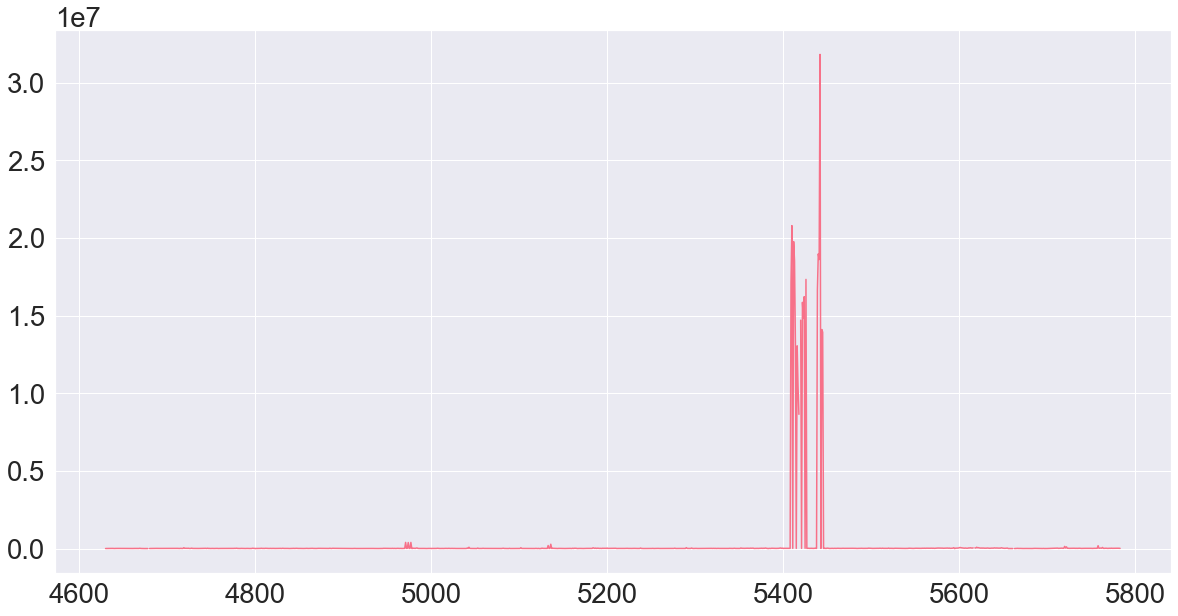

In [37]:
stock_temp['Volume'].plot(figsize = (20,10))

In [38]:
merged_data = pd.merge(data, stock_temp, on = 'Date', how = 'right')
merged_data

,Date,headline_text,words,chars,avg_word,stop_words,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2020-06-24,never thought voice today vidya rajput never t...,4503,28022,5.223185,842,95,193,0.064382,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
1150,2020-06-25,truck firms look export markets sell bs6 range...,4507,27935,5.198358,883,109,167,-0.011207,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
1151,2020-06-26,containment zone residents slam high prices ch...,4508,28026,5.217169,884,100,185,0.039440,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
1152,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,4572,28443,5.221347,930,125,156,0.034411,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [39]:
merged_data = merged_data.dropna(how = 'any', axis = 0)

In [40]:
print("Dimension : {}".format(merged_data.shape), "\n")
print("Size : {}".format(merged_data.size), "\n")
print("No. of Duplicated Values : {}".format(merged_data.duplicated().sum()), "\n")
print("No. of Rows with NULL Values :\n{}".format(merged_data.isnull().sum()), "\n")
print("\nInfo of Dataset : {}".format(merged_data.info()), "\n")

Dimension : (1150, 15) 

Size : 17250 

No. of Duplicated Values : 0 

No. of Rows with NULL Values :
Date             0
headline_text    0
words            0
chars            0
avg_word         0
stop_words       0
numerics         0
upper            0
sentiment        0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1153
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1150 non-null   datetime64[ns]
 1   headline_text  1150 non-null   object        
 2   words          1150 non-null   int64         
 3   chars          1150 non-null   int64         
 4   avg_word       1150 non-null   float64       
 5   stop_words     1150 non-null   int64         
 6   numerics       1150 non-null   int64         
 7   upper          1150 non-nul

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
pd.options.mode.chained_assignment = None
df = []
sid = vader()
merged_data['scores'] = merged_data['headline_text'].apply(lambda x : sid.polarity_scores(x))
merged_data.head()

,Date,headline_text,words,chars,avg_word,stop_words,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,scores
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,"{'neg': 0.179, 'neu': 0.698, 'pos': 0.123, 'co..."
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,"{'neg': 0.171, 'neu': 0.714, 'pos': 0.115, 'co..."
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,"{'neg': 0.171, 'neu': 0.705, 'pos': 0.124, 'co..."
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,"{'neg': 0.169, 'neu': 0.703, 'pos': 0.128, 'co..."
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,"{'neg': 0.154, 'neu': 0.715, 'pos': 0.131, 'co..."


In [43]:
merged_data['compound'] = merged_data['scores'].apply(lambda score_dict : score_dict['compound'])
merged_data['pos'] = merged_data['scores'].apply(lambda score_dict : score_dict['pos'])
merged_data['neg'] = merged_data['scores'].apply(lambda score_dict : score_dict['neg'])
merged_data['neu'] = merged_data['scores'].apply(lambda score_dict : score_dict['neu'])

merged_data = merged_data.drop('scores', axis = 1)
merged_data

,Date,headline_text,words,chars,avg_word,stop_words,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,-0.9998,0.123,0.179,0.698
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,-0.9999,0.115,0.171,0.714
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,-0.9997,0.124,0.171,0.705
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,-0.9997,0.128,0.169,0.703
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,-0.9993,0.131,0.154,0.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2020-06-24,never thought voice today vidya rajput never t...,4503,28022,5.223185,842,95,193,0.064382,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.9997,0.089,0.145,0.765
1150,2020-06-25,truck firms look export markets sell bs6 range...,4507,27935,5.198358,883,109,167,-0.011207,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.9999,0.077,0.175,0.748
1151,2020-06-26,containment zone residents slam high prices ch...,4508,28026,5.217169,884,100,185,0.039440,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,-0.9998,0.096,0.163,0.740
1152,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,4572,28443,5.221347,930,125,156,0.034411,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,-0.9998,0.092,0.165,0.742


C:\Users\lucky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

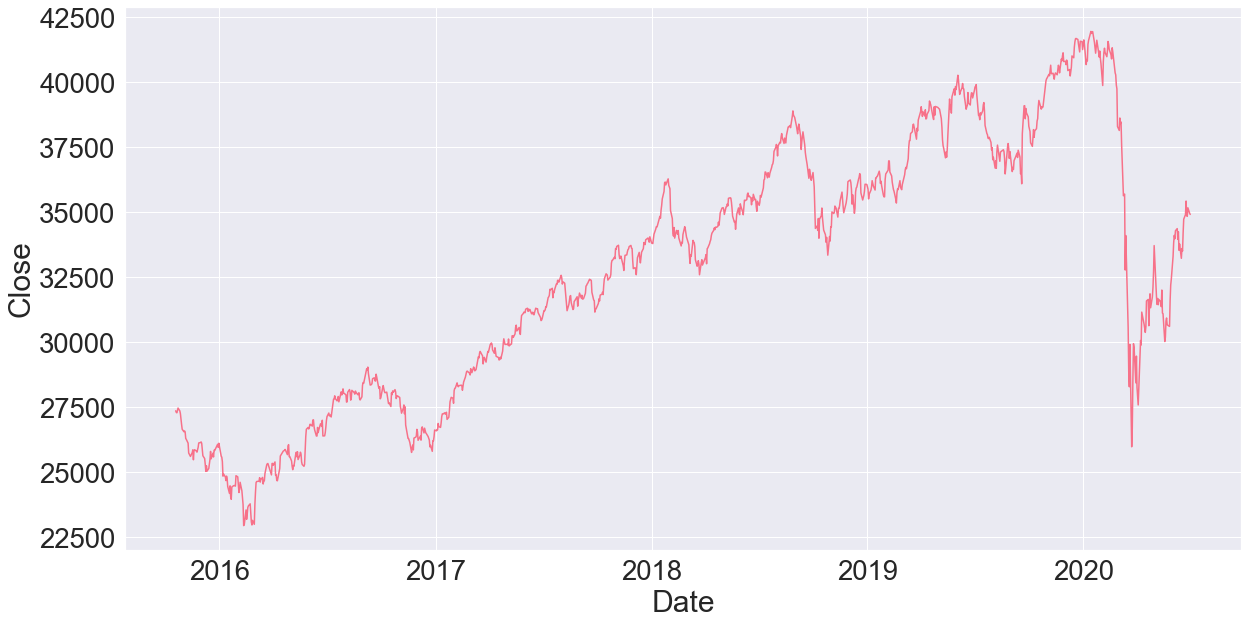

In [44]:
plt.figure(figsize = (20,10))
sns.lineplot(merged_data['Date'], merged_data['Close'])

In [45]:
merged_data['predicted_price'] = np.where(merged_data['Close'].shift(-1) > merged_data['Close'], 1, 0)
merged_data.head()

,Date,headline_text,words,chars,avg_word,stop_words,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu,predicted_price
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,-0.9998,0.123,0.179,0.698,0
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,-0.9999,0.115,0.171,0.714,0
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,-0.9997,0.124,0.171,0.705,1
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,-0.9997,0.128,0.169,0.703,0
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,-0.9993,0.131,0.154,0.715,0


In [46]:
x = merged_data[['sentiment', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'compound', 'pos', 'neg', 'neu']]
y = merged_data['predicted_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(920, 10)
(230, 10)


In [47]:
tuned_parameters = [{'max_depth' : [10,20],
                    'n_estimators' : [10,20],
                    'max_features' : ['sqrt',0.2]}]

random_fClf = RandomForestClassifier()
clf = GridSearchCV(random_fClf, tuned_parameters, cv = 5, scoring = 'roc_auc')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [48]:
clf.best_score_

0.47692617709522145

In [49]:
clf.best_params_

{'max_depth': 20, 'max_features': 0.2, 'n_estimators': 20}

In [50]:
randomClassifier = RandomForestClassifier(n_estimators = 10, max_depth = 24, max_features = 'sqrt')
randomClassifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=24, max_features='sqrt', n_estimators=10)

In [51]:
y_prediction = randomClassifier.predict(x_test)
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       117
           1       0.52      0.57      0.54       113

    accuracy                           0.53       230
   macro avg       0.53      0.53      0.53       230
weighted avg       0.53      0.53      0.53       230



In [52]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error : 0.46956521739130436
Mean Squared Error : 0.46956521739130436
Root Mean Squared Error : 0.6852482888641929
